In [4]:
import sys, os
module_path = os.path.abspath(os.getcwd()+'/..')

sys.path.append(module_path)

from benchmark.runs.run import Run
from benchmark.runs.warmup import Warmup
from benchmark.runs.vllm import vLLMRun
from benchmark.main import Benchmark
from benchmark.dataset import Dataset


In [5]:

# With encoding

async def load_test(model: str, dataset: Dataset, name: str):

    # Configure runs
    warmup: Run = vLLMRun(model=model, dataset=dataset, passes=500)

    run1: Run = vLLMRun(model=model, dataset=dataset, passes=1)
    run5: Run = vLLMRun(model=model, dataset=dataset, passes=5)
    run10: Run = vLLMRun(model=model, dataset=dataset, passes=10)
    run20: Run = vLLMRun(model=model, dataset=dataset, passes=20)
    run40: Run = vLLMRun(model=model, dataset=dataset, passes=40)
    run100: Run = vLLMRun(model=model, dataset=dataset, passes=100)
    run200: Run = vLLMRun(model=model, dataset=dataset, passes=200)
    run500: Run = vLLMRun(model=model, dataset=dataset, passes=500)
    run1000: Run = vLLMRun(model=model, dataset=dataset, passes=1000)
    run2000: Run = vLLMRun(model=model, dataset=dataset, passes=2000)
    run5000: Run = vLLMRun(model=model, dataset=dataset, passes=5000)

    # Configure classes
    benchmark = Benchmark(name=name, runs=[warmup, run1, run5, run10, run20, run40, run100, run200, run500, run1000, run2000, run5000])

    await benchmark.run_async()

    print(benchmark.collect_results())


In [6]:
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")
pythia70m: str = "EleutherAI/pythia-70m"
await load_test(model="EleutherAI/pythia-70m", dataset=dataset, name="pythia-70m")
await load_test(model="EleutherAI/pythia-160m", dataset=dataset, name="pythia-160m")
await load_test(model="EleutherAI/pythia-410m", dataset=dataset, name="pythia-410m")
await load_test(model="EleutherAI/pythia-1b", dataset=dataset, name="pythia-1b")
await load_test(model="EleutherAI/pythia-1.4b", dataset=dataset, name="pythia-1.4b")
await load_test(model="EleutherAI/pythia-2.8b", dataset=dataset, name="pythia-2.8b")
await load_test(model="EleutherAI/pythia-6.9b", dataset=dataset, name="pythia-6.9b")



Total progress:   0%|          | 0/12 [00:00<?, ?it/s]

no container of model found
starting container
elapsed time: 4 - Status: created
elapsed time: 8 - Status: created
elapsed time: 12 - Status: created
elapsed time: 16 - Status: created
elapsed time: 20 - Status: created
elapsed time: 24 - Status: created
elapsed time: 28 - Status: created


[codecarbon WARNING @ 22:10:09] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 22:10:09] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



elapsed time: 32 - Status: created


[codecarbon WARNING @ 22:10:10] We saw that you have a 13th Gen Intel(R) Core(TM) i9-13900K but we don't know it. Please contact us.
100%|██████████| 500/500 [00:15<00:00, 31.27it/s]


APIError: 409 Client Error for http+docker://localhost/v1.47/containers/create?name=vLLM-pythia-70m: Conflict ("Conflict. The container name "/vLLM-pythia-70m" is already in use by container "c88b34f8152d6bdec4251c7a907cb98338e7ce931f477783bd2f40c67c7f9595". You have to remove (or rename) that container to be able to reuse that name.")

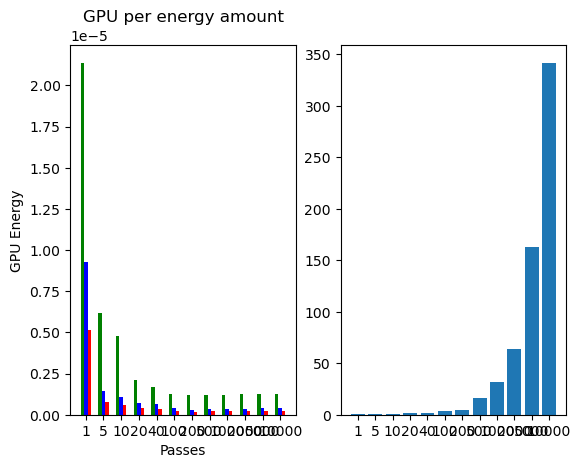

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Graph data


def data_from_json(file: str, type: str) -> [float]:
    data = json.load(open(file))

    return [data["runs"][0][type], data["runs"][1][type], data["runs"][2][type], data["runs"][3][type], data["runs"][4][type], data["runs"][5][type], data["runs"][6][type], data["runs"][7][type], data["runs"][8][type], data["runs"][9][type], data["runs"][10][type], data["runs"][11][type]]


x = np.arange(12)

results1 = data_from_json("results_vLLM-20241218-121854.json", "gpu_energy")
#  results2 = data_from_json("resultsV3.json", "gpu_energy")
#   results3 = data_from_json("results_with_encoding-20241203-174821.json", "gpu_energy")
#   results4 = data_from_json("results_with_encoding-20241203-195144.json", "gpu_energy")
#   results5 = data_from_json("results_with_encoding-20241203-200703.json", "gpu_energy")

ram_energy1 = data_from_json("results_vLLM-20241218-121854.json", "ram_energy")
#   ram_energy2 = data_from_json("resultsV3.json", "ram_energy")
#   ram_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "ram_energy")
#   ram_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "ram_energy")
#   ram_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "ram_energy")

cpu_energy1 = data_from_json("results_vLLM-20241218-121854.json", "cpu_energy")
#   cpu_energy2 = data_from_json("resultsV3.json", "cpu_energy")
#   cpu_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "cpu_energy")
#   cpu_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "cpu_energy")
#   cpu_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "cpu_energy")

duration1 = data_from_json("results_vLLM-20241218-121854.json", "duration")
#   duration2 = data_from_json("resultsV3.json", "duration")
#   duration3 = data_from_json("results_with_encoding-20241203-174821.json", "duration")
#   duration4 = data_from_json("results_with_encoding-20241203-195144.json", "duration")
#   duration5 = data_from_json("results_with_encoding-20241203-200703.json", "duration")


x_values = [1, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 5000, 10000]

gpu = np.divide(np.mean([results1], axis=0), x_values)
ram = np.divide(np.mean([ram_energy1], axis=0), x_values)
cpu = np.divide(np.mean([cpu_energy1], axis=0), x_values)
time = np.mean([duration1], axis=0)

x_labels = ["1", "5", "10", "20", "40", "100", "200", "500", "1000", "2000", "5000", "10000"]
plt.subplot(1, 2, 1)
plt.bar(x-0.2, gpu, color="g", align="center", width=0.2)
plt.bar(x+0.2, ram, color="r", align="center", width=0.2)
plt.bar(x, cpu, color="b", align="center", width=0.2)

plt.xlabel("Passes")
plt.ylabel("GPU Energy")
plt.title("GPU per energy amount")
plt.xticks(x, x_labels)

plt.subplot(1, 2, 2)
plt.bar(x, time)
plt.xticks(x, x_labels)

plt.show()
